In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.style.use('classic')
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import BatchNormalization
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.datasets import cifar10
from keras.utils import normalize, to_categorical
from keras.layers import Dropout
from keras.optimizers import SGD


(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Cifar10 dataset 
## INFO:
    - 60,000 32×32 pixel images divided into 10 classes.

## Classes:
- 0: airplane
- 1: automobile
- 2: bird
- 3: cat
- 4: deer
- 5: dog
- 6: frog
- 7: horse
- 8: ship
- 9: truck

#VGG16 info
https://neurohive.io/en/popular-networks/vgg16/
"""

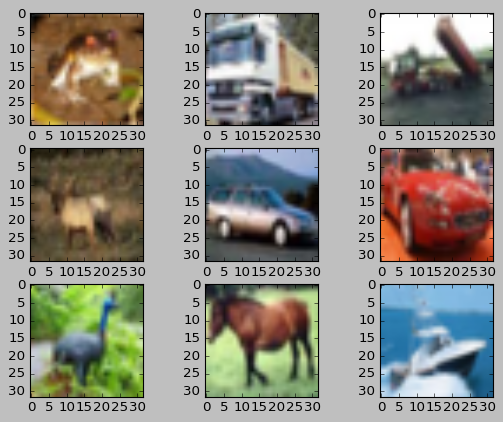

In [3]:
#view few images 
for i in range(9):
	plt.subplot(330 + 1 + i)
	plt.imshow(X_train[i])
plt.show()

# Normalization?

- Yes!
I need values between 0 and 1 for several reasons:
    - Some libraries support only images in this interval
    - Otherwise when doing computatation there are huge approximations and this leads to errors
    - some activation needs value in a range!

In [4]:
X_train = normalize(X_train, axis=1)
X_test = normalize(X_test, axis=1)

In [5]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Defining the Architecture

# How to decide the topology?

Steps:
- Look at the literature!
- Define number of epochs!
- After found one type of architecture:
- try it! but every db can be different! so:
    -  Tips:
        - Define k versions of a given topology (eg. with 2 blocks (2 conv layers))
        - eg (batch norm is not needed!):
        - one is without Batch_norm and without dropout
        - one with Batch_norm and without dropout
        - one with Batch_norm and droput
    - Train with the given number of epochs
    - Measure the performances!
        - visualize the loss curves 
        - visualize the metrics curves (eg. accuracy)
        - see if there is the need for more epochs!
        - or if there are too many fluctuations in the val set!
            - can be overfitting!
            - add more regularization and check!
    - analyse the results of the experiments!
    - do the same adding a new block

In [6]:
#VGG model with 3 blocks + dropout + batch normalization
model3_drop_norm = Sequential()
model3_drop_norm.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
model3_drop_norm.add(BatchNormalization())
model3_drop_norm.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3_drop_norm.add(BatchNormalization())
model3_drop_norm.add(MaxPooling2D((2, 2)))
model3_drop_norm.add(Dropout(0.3))
model3_drop_norm.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3_drop_norm.add(BatchNormalization())
model3_drop_norm.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3_drop_norm.add(BatchNormalization())
model3_drop_norm.add(MaxPooling2D((2, 2)))
model3_drop_norm.add(Dropout(0.4))
model3_drop_norm.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3_drop_norm.add(BatchNormalization())
model3_drop_norm.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model3_drop_norm.add(BatchNormalization())
model3_drop_norm.add(MaxPooling2D((2, 2)))
model3_drop_norm.add(Dropout(0.5))
model3_drop_norm.add(Flatten())
model3_drop_norm.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model3_drop_norm.add(BatchNormalization())
model3_drop_norm.add(Dropout(0.5))
model3_drop_norm.add(Dense(10, activation='softmax'))
# compile model
opt = SGD(learning_rate=0.001, momentum=0.9)
model3_drop_norm.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model3_drop_norm.summary()

/Users/simoneboesso/Desktop/nuclei-segmentation/nuclei/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 552,874 (2.11 MB)

 Trainable params: 551,722 (2.10 MB)

 Non-trainable params: 1,152 (4.50 KB)

# Some useful remarks:
- why  i need weights initialization?
    - well with better weights i converge faster!
- Batch normalization normalize the outputs of the activations functions (have zero mean and unit variance)

Batch normalization helps reduce the internal covariate shift by normalizing the activations of each layer within a mini-batch. The internal covariate shift refers to the change in the distribution of activations as the network parameters are updated during training. Here's how BatchNorm reduces this shift:

1. **Normalization**: By normalizing the activations of each layer, BatchNorm ensures that the mean and variance of the activations remain relatively constant throughout training. This prevents large shifts in the distribution of activations as the network parameters change, reducing the internal covariate shift.

2. **Stabilizing Gradients**: Normalizing the activations helps in stabilizing the gradients flowing through the network. When activations have a consistent scale, gradients are less likely to become vanishingly small or explode during backpropagation. This stabilizes the training process and helps in more efficient parameter updates.

3. **Faster Convergence**: By reducing the internal covariate shift and stabilizing gradients, BatchNorm enables faster convergence during training. When the distribution of activations remains stable, the optimization process can proceed more smoothly, leading to faster training and convergence towards the optimal solution.

Overall, by addressing the internal covariate shift, BatchNorm helps in stabilizing the training process, improving the efficiency of optimization, and ultimately leading to better performance of the neural network model.

In [10]:
# Data augmentation to improve the model
train_datagen = ImageDataGenerator(rotation_range=45,
    width_shift_range=0.2,
    zoom_range = 0.2,
    horizontal_flip = True)
train_datagen.fit(X_train)

train_generator = train_datagen.flow(
    X_train,
    y_train,
    batch_size = 32)


In [11]:
type(model3_drop_norm)

keras.src.models.sequential.Sequential

In [12]:
total_number_of_samples = len(train_generator)  # Total number of samples in your training dataset
batch_size = 32  # Batch size used during training
history = model3_drop_norm.fit(
        train_generator,
        steps_per_epoch = total_number_of_samples // batch_size,
        epochs = 200,
        validation_data = (X_test, y_test))

Epoch 1/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.2790 - loss: 1.8982 - val_accuracy: 0.2594 - val_loss: 1.9674
Epoch 2/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 150ms/step - accuracy: 0.3229 - loss: 1.8620 - val_accuracy: 0.3179 - val_loss: 1.8361
Epoch 3/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 7s 151ms/step - accuracy: 0.3420 - loss: 1.8137 - val_accuracy: 0.2979 - val_loss: 1.8735
Epoch 4/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 164ms/step - accuracy: 0.3176 - loss: 1.8423 - val_accuracy: 0.3055 - val_loss: 1.8430
Epoch 5/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - accuracy: 0.3459 - loss: 1.7891 - val_accuracy: 0.2459 - val_loss: 2.0137
Epoch 6/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 9s 192ms/step - accuracy: 0.3363 - loss: 1.7880 - val_accuracy: 0.2635 - val_loss: 1.9668
Epoch 7/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.3343 - loss: 1.8285 - val_accuracy: 0.2791 - val_loss: 1.9750
Epoch 8/200
48/48 ━━━━━━━━━━━━━━━━━━━━ 8s 162ms/step - accuracy: 0.3498 - loss: 1.8092 - val_accu

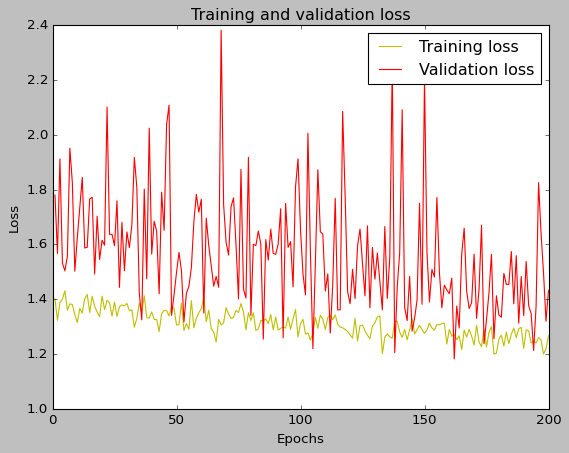

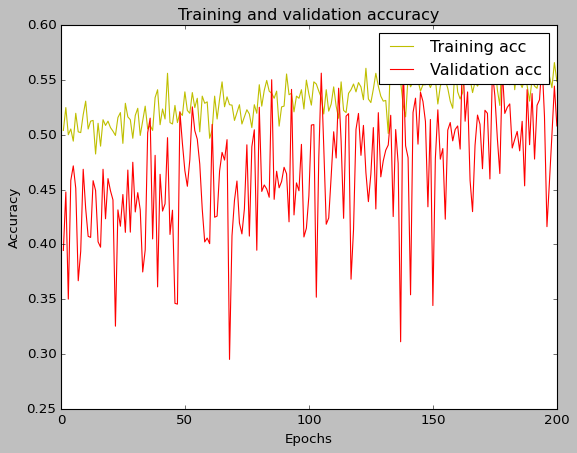

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()